# Data Science Project Lifecycle - A Case Study


## Step 1: Busines Understanding
### Problem Statement: Prediction of Yahoo Stock Market
### Data Set: Yahoo Stock Price

### ہمیں مسئلہ یہ درپیش ہے کہ یاہو کے اثاثوں کی مستقبل قریب میں کیا قیمت ہو گی؟ اس مرحلے میں کچھ اضافی سوالوں پر بھی نظر ثانی کرنی پڑتی ہے تاکہ ایک بہتر اور مفید ڈیٹا سیٹ حاصل کیا جا سکے۔ مثلاً، وہ کون سے عناصر ہیں جو اثاثوں کی قیمتوں پر نظرانداز ہو سکتے ہیں؟ کیا قیمتوں کا انحصار مدِ مقابل کمپنیوں کی قدر گرنے سے تو نہیں؟ کیا خارجی پالیسی اثاثوں کی قدر پر اثر انداز ہوتی ہیں؟ کیا اثاثوں کی قیمت کے برھان کا سبب مہنگائی تو نہیں۔ وغیرہ وغیرہ
### ان سوالوں کی بنیاد پر ہم درپیش مسئلے کو مختلف زاویوں سے دیکھتے ہیں اور تجزیہ کرنے کے لئے متعلقہ ڈیٹا سیٹس کو اکٹھا کرتے ہیں۔


### ڈیٹا سائنس لائف سائیکل کے پورے پروسس کو سمجھنے کے لئے ہم اس کیس اسٹڈی کا مطالعہ و تجزیہ کر رہے ہیں۔ 
 

## Step 2: Data Exploration 

#### Import Libraries

In [1]:
import pandas as pd 
from datetime import datetime
import numpy as np 
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

#### Read Dataset

In [2]:
SPY_data = pd.read_csv("C:/Users/sana.rasheed/Downloads/SPY_2015.csv")
 
# Change the Date column from object to datetime object 
SPY_data["Date"] = pd.to_datetime(SPY_data["Date"])
 
# Preview the data
SPY_data.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000
1,2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000
2,2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000
3,2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
4,2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
5,2015-11-30,2090.949951,2093.810059,2080.409912,2080.409912,2080.409912,4245030000
6,2015-11-27,2088.820068,2093.290039,2084.129883,2090.110107,2090.110107,1466840000
7,2015-11-25,2089.300049,2093.000000,2086.300049,2088.870117,2088.870117,2852940000
8,2015-11-24,2084.419922,2094.120117,2070.290039,2089.139893,2089.139893,3884930000
9,2015-11-23,2089.409912,2095.610107,2081.389893,2086.590088,2086.590088,3587980000


## Step 3: Data Cleansing and Transformation

#### Indexing and Sorting

In [3]:
# Set Date as index
SPY_data.set_index('Date',inplace=True)
 
# Reverse the order of the dataframe in order to have oldest values at top
SPY_data.sort_values('Date',ascending=True)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000
...,...,...,...,...,...,...
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000


#### Check Null Values

In [4]:
# Take the name of the columns of the SPY_data to see if null values exists
variables = SPY_data.columns 
SPY_data.isnull().sum().loc[variables]

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

## Step 4: Exploratory Data Analysis

In [5]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))
 
def correlation(df,variables, n_rows, n_cols):
    fig = plt.figure(figsize=(8,6))
    #fig = plt.figure(figsize=(14,9))
    for i, var in enumerate(variables):
        ax = fig.add_subplot(n_rows,n_cols,i+1)
        asset = df.loc[:,var]
        ax.scatter(df["Adj Close"], asset, c = next(colors))
        ax.set_xlabel("Adj Close")
        ax.set_ylabel("{}".format(var))
        ax.set_title(var +" vs price")
    fig.tight_layout() 
    plt.show()

### Correlation
#### Is there any correlation between Volume and Adj Close price?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


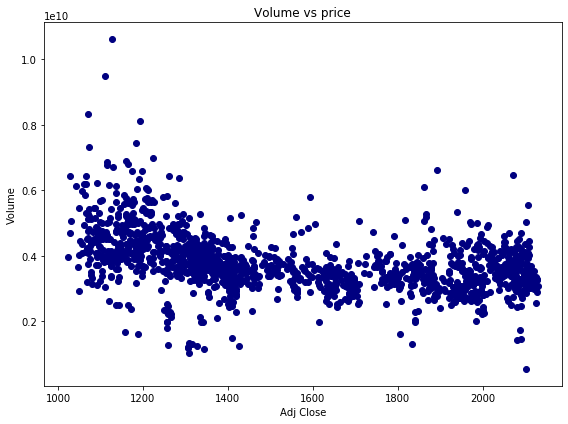

In [6]:
# Is there any correlation between Volume and Adj Close price?
variables =SPY_data.columns[-1:] # read last column name
correlation(SPY_data,variables,1,1)

#### Is there any correlation between Adj Close price vs. Open, High, Low, Close  ?

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

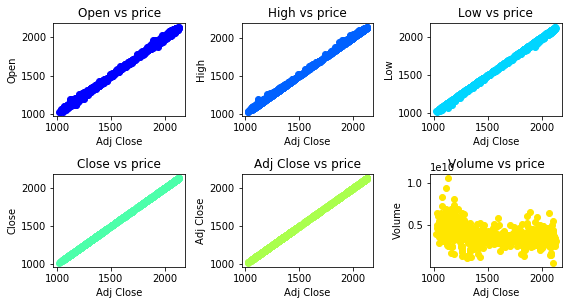

In [7]:
# Is there any correlation between Adj Close price vs. Open, High, Low, Close?
variables =SPY_data.columns#[0:6]   
correlation(SPY_data,variables,3,3)

In [8]:
SPY_data.corr()['Adj Close'].loc[variables]

Open         0.999187
High         0.999637
Low          0.999702
Close        1.000000
Adj Close    1.000000
Volume      -0.408814
Name: Adj Close, dtype: float64

## Step 5: Featuer Engineering

In [9]:
SPY_data['High-Low_pct'] = (SPY_data['High'] - SPY_data['Low']).pct_change()
SPY_data['ewm_5'] = SPY_data["Close"].ewm(span=5).mean().shift(periods=1)
SPY_data['price_std_5'] = SPY_data["Close"].rolling(center=False,window= 30).std().shift(periods=1)
 
SPY_data['volume Change'] = SPY_data['Volume'].pct_change()
SPY_data['volume_avg_5'] = SPY_data["Volume"].rolling(center=False,window=5).mean().shift(periods=1)
SPY_data['volume Close'] = SPY_data["Volume"].rolling(center=False,window=5).std().shift(periods=1)

#### Correlation with New features

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

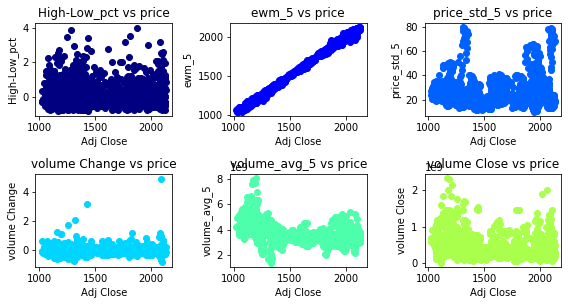

In [10]:
jet= plt.get_cmap('jet')
colors = iter(jet(np.linspace(0,1,10)))

# Take the name of the last 6 columns of the SPY_data which are the model features
variables = SPY_data.columns[-6:]  
 
correlation(SPY_data,variables,3,3)

In [11]:
SPY_data.corr()['Adj Close'].loc[variables]

High-Low_pct    -0.010328
ewm_5            0.998513
price_std_5      0.100524
volume Change   -0.005446
volume_avg_5    -0.485734
volume Close    -0.241898
Name: Adj Close, dtype: float64

## Step 6: Build Predictive Model

#### Check Null values

In [12]:
SPY_data.head(5)

,Open,High,Low,Close,Adj Close,Volume,High-Low_pct,ewm_5,price_std_5,volume Change,volume_avg_5,volume Close
Date,,,,,,,,,,,,
2015-12-07,2090.419922,2090.419922,2066.780029,2077.070068,2077.070068,4043820000,NaN,NaN,NaN,NaN,NaN,NaN
2015-12-04,2051.239990,2093.840088,2051.239990,2091.689941,2091.689941,4214910000,0.802043,2077.070068,NaN,0.042309,NaN,NaN
2015-12-03,2080.709961,2085.000000,2042.349976,2049.620117,2049.620117,4306490000,0.001172,2085.841992,NaN,0.021728,NaN,NaN
2015-12-02,2101.709961,2104.270020,2077.110107,2079.510010,2079.510010,3950640000,-0.363191,2068.684262,NaN,-0.082631,NaN,NaN
2015-12-01,2082.929932,2103.370117,2082.929932,2102.629883,2102.629883,3712120000,-0.247413,2073.181111,NaN,-0.060375,NaN,NaN


In [13]:
SPY_data.isnull().sum().loc[variables]

High-Low_pct      1
ewm_5             1
price_std_5      30
volume Change     1
volume_avg_5      5
volume Close      5
dtype: int64

#### Drop/Remove NA records

In [14]:
# To train a model, it is necessary to drop missing values.
SPY_data = SPY_data.dropna(axis=0)

#### Train & Test Dataset Distribution

In [15]:
# Generate the train and test sets
train = SPY_data[SPY_data.index < datetime(year=2015, month=1, day=1)]

test = SPY_data[SPY_data.index >= datetime(year=2015, month=1, day=1)]
dates = test.index

#### Building Regression Model

In [16]:
lr = LinearRegression()
X_train = train[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]]
 
Y_train = train["Adj Close"]
 
lr.fit(X_train,Y_train)      

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### Test Dataset

In [17]:
# Create the test features dataset (X_test) which will be used to make the predictions.
X_test = test[["High-Low_pct","ewm_5","price_std_5","volume_avg_5","volume Change","volume Close"]].values 

# The labels of the model
Y_test = test["Adj Close"].values # will be used for comparison

#### Prediction

In [18]:
close_predictions = lr.predict(X_test)   

### Model Evaluation

#### Mean Absolute Error (MAE):
In statistics, mean absolute error (MAE) is a measure of errors between paired observations expressing the same phenomenon. Examples of Y versus X include comparisons of predicted versus observed, subsequent time versus initial time, and one technique of measurement versus an alternative technique of measurement. MAE is calculated as:

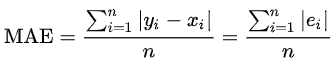

The mean absolute error is a common measure of forecast error in time series analysis.

In [19]:
mae = sum(abs(close_predictions - test["Adj Close"].values)) / test.shape[0]
print(mae)

18.09037765362944


The MAE value is approx. 18. 

#### Error Graph for last 25 days
Simple error (Actual - Predicted) computered and ploted for last 25 days. 

C:\Users\sana.rasheed\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


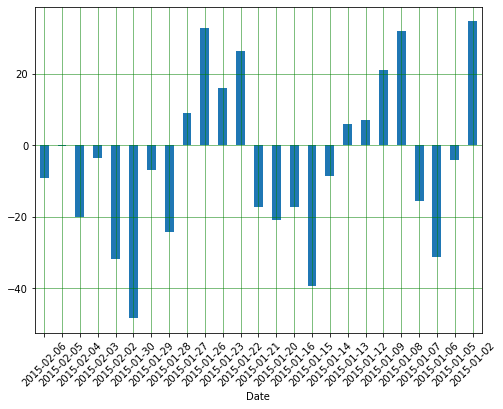

In [20]:
# Create a dataframe that output the Date, the Actual and the predicted values
df = pd.DataFrame({'Date':dates,'Actual': Y_test, 'Predicted': close_predictions})
df1 = df.tail(25)
 
# set the date with string format for plotting
df1['Date'] = df1['Date'].dt.strftime('%Y-%m-%d')
 
df1.set_index('Date',inplace=True)
 
error = df1['Actual'] - df1['Predicted']
 
# Plot the error term between the actual and predicted values for the last 25 days
 
error.plot(kind='bar',figsize=(8,6))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.xticks(rotation=45)
plt.show()